In [141]:
#EJERCICIO 1
#importaremos las librerías que necesitamos para tratar los datos
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#EJERCICIO 2
#importamos los datasets y visualizamos la información de las columnas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train, test]

print(train.columns)
print (test.columns)

#vemos los datos de dentro de las columnas
train.sample(4)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S


In [143]:
#EJERCICIO 3

#vemos los datos de la tabla
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [144]:
#como vemos que evarias columnas hay valores NaN lo que hacemos es ver en cuales estan
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


('Percentage of females who survived:', 74.20382165605095)
('Percentage of males who survived:', 18.890814558058924)


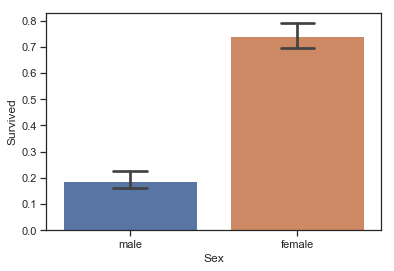

In [145]:
#4-Dibujamos los valores de los que queremos tratar los datos y son 
sns.barplot(x="Sex", y="Survived", data=train, capsize=.2)

#imprimimos los porcentajes de mujeres y hombres para normalizarlos
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

('Percentage of Pclass = 1 who survived:', 62.96296296296296)
('Percentage of Pclass = 2 who survived:', 47.28260869565217)
('Percentage of Pclass = 3 who survived:', 24.236252545824847)


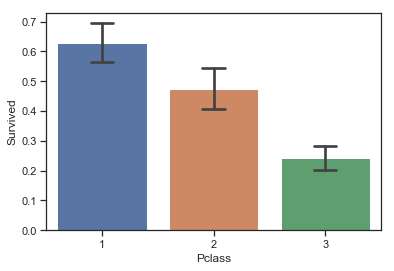

In [146]:
#miramos si tienen más probabilidad de sobrevivir en función de la clase
sns.barplot(x="Pclass", y="Survived", data=train, capsize=.2)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

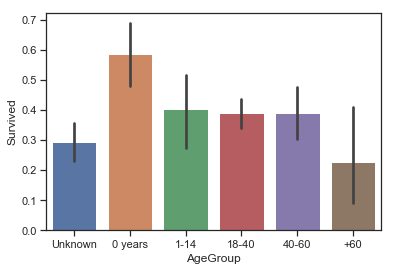

In [147]:
#miramos la probabilidad de sobrevivir en función de la edad ( manteniendo el test a 40 y el train a 60)

train["Age"] = train["Age"].fillna(-0.6)
test["Age"] = test["Age"].fillna(-0.4)
bins = [-1, 0, 14, 18, 40, 60, np.inf]
labels = ['Unknown', '0 years', '1-14', '18-40', '40-60', '+60']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

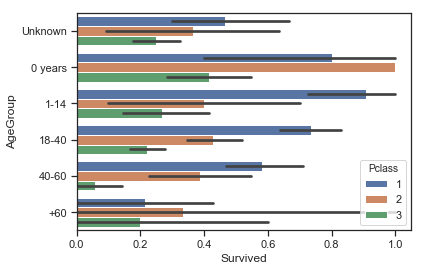

In [148]:
#probabilidad supervivencia en función de la edad y la clase

sns.barplot(x="Survived", y="AgeGroup", hue= "Pclass", data=train)
plt.show()

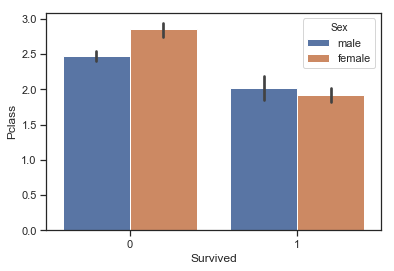

In [149]:
#probabilidad de sobrevivir en función de la clase y el sexo
sns.barplot(x="Survived", y="Pclass", hue= "Sex", data=train,)
plt.show()

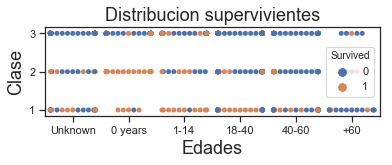

In [150]:
#vemos los supervivientes por edad y clase. 0 cuenta como muertes y 1 es supervivientes
plt.subplot(2,1,2)
sns.swarmplot(x="AgeGroup",y="Pclass",data=train,
              hue="Survived", palette="deep", )

plt.ylabel("Clase", fontsize=18)
plt.xlabel("Edades", fontsize=18)
plt.title("Distribucion supervivientes", fontsize=18)

plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.show()